In [17]:
import astropy
import photutils
from astropy.io import fits

import numpy as np
import os
import matplotlib.pyplot as plt


In [22]:
master_bias = np.zeros((1024, 1536))
master_flat = np.zeros((1024, 1536))
num_bias=0
num_flats=0
for file in os.listdir('monday/20230918/'):
    if 'bias_good' in file:
        fits1 = fits.open(name='monday/20230918/'+file)
        bias = fits1[0].data
        master_bias = master_bias + (bias/np.median(bias))
        num_bias+=1
        #np.shape(allflat)
        #print(file)
        
    if ('flat' in file) and ('black' in file):
        fits1 = fits.open(name='monday/20230918/'+file)
        flat = fits1[0].data
        master_flat = master_flat + (flat/np.median(flat))
        num_flats+=1
        #print(file)
        
print(num_bias, num_flats)

70 17


Text(0, 0.5, 'ypix')

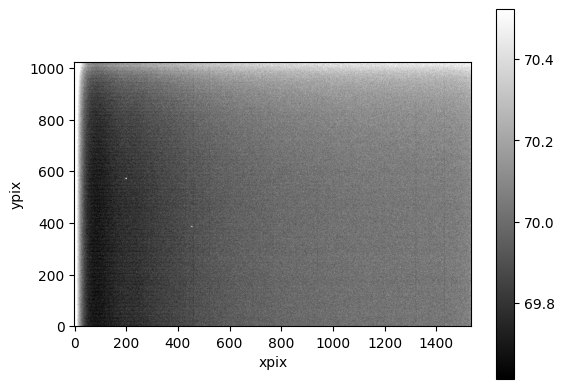

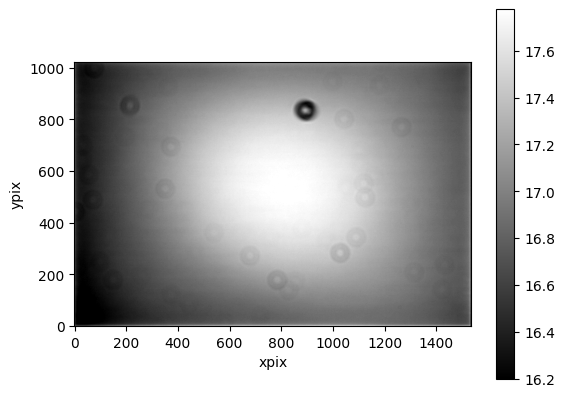

In [24]:
lo,up = np.percentile(master_bias,1),np.percentile(master_bias,99)
plt.figure()
plt.imshow(master_bias,cmap='gray',origin='lower',clim=(lo,up))
plt.colorbar()
plt.xlabel('xpix')
plt.ylabel('ypix')

lo,up = np.percentile(master_flat,1),np.percentile(master_flat,99)
plt.figure()
plt.imshow(master_flat,cmap='gray',origin='lower',clim=(lo,up))
plt.colorbar()
plt.xlabel('xpix')
plt.ylabel('ypix')

hd 180450_2023-09-18_21-34-04_black_0231.fits


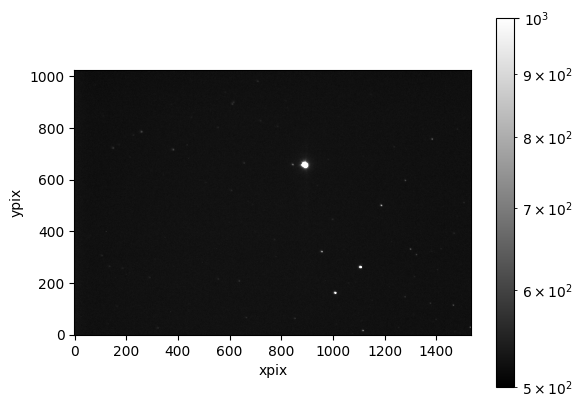

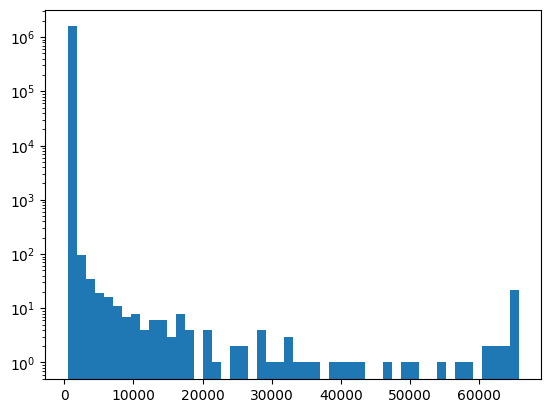

In [36]:
master_bias = np.zeros((1024, 1536))
master_flat = np.zeros((1024, 1536))
i=0
for file in os.listdir('monday/20230918/'):
    if 'hd 180450' in file:
        hd_18 = fits.open(name='monday/20230918/'+file)
        hd_18 = hd_18[0].data
        hd_18 = hd_18 + np.asarray(hd_18/np.median(hd_18))
        #np.shape(allflat)
        print(file)
        #lo,up = np.percentile(flat,1),np.percentile(flat,5)
        lo,up=500,1000
        plt.figure()
        plt.imshow(hd_18, cmap='gray', origin='lower', clim=(lo,up), norm='log')
        plt.colorbar()
        plt.xlabel('xpix')
        plt.ylabel('ypix')
        plt.show()
        
        plt.figure()
        plt.hist(hd_18.flatten(),bins=50, log=True)
        plt.show()
        i+=1
        if i==1:
            break
    